# Statistical evaluation of rainfall time series

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

In [2]:
xl_file = pd.ExcelFile('india___monthly_rainfall_data___1901_to_2002.xlsx')

In [3]:
df = pd.read_excel(xl_file, sheet_name='India 1901-2002')

In [4]:
df.shape

(55319, 16)

In [5]:
df.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,vlookup
0,Andaman & Nicobar Islands,Andaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsAndaman
1,Andaman & Nicobar Islands,Nicobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsNicobar
2,Andhra Pradesh,Adilabad,1901.0,6.725,10.488,23.288,35.560,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000,Andhra PradeshAdilabad
3,Andhra Pradesh,Adilabad,1902.0,0.420,0.000,0.388,6.070,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222,Andhra PradeshAdilabad
4,Andhra Pradesh,Adilabad,1903.0,6.643,1.956,0.173,4.551,33.348,132.078,436.611,334.544,226.037,138.818,14.095,8.823,Andhra PradeshAdilabad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55319 entries, 0 to 55318
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     55319 non-null  object 
 1   District  55319 non-null  object 
 2   Year      55284 non-null  float64
 3   Jan       55284 non-null  float64
 4   Feb       55284 non-null  float64
 5   Mar       55284 non-null  float64
 6   Apr       55284 non-null  float64
 7   May       55284 non-null  float64
 8   Jun       55284 non-null  float64
 9   Jul       55284 non-null  float64
 10  Aug       55284 non-null  float64
 11  Sep       55284 non-null  float64
 12  Oct       55284 non-null  float64
 13  Nov       55284 non-null  float64
 14  Dec       55284 non-null  float64
 15  vlookup   55217 non-null  object 
dtypes: float64(13), object(3)
memory usage: 6.8+ MB


In [7]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000,55284.000000
mean,1951.500000,13.366994,16.601985,21.331684,39.024544,74.148196,185.433057,298.974369,275.109878,182.005233,78.450823,28.337752,11.664977
std,29.443715,18.313972,22.226753,34.455017,69.560985,130.192456,202.038597,203.923241,165.565957,126.668048,93.332582,58.227361,30.887515
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221000,0.642000,0.586000,0.163000,0.000000,0.000000,0.000000
25%,1926.000000,0.782000,1.058000,1.371750,2.497000,6.443000,57.029500,163.844500,158.013750,95.179500,8.375000,0.284000,0.063000
50%,1951.500000,6.736000,8.324500,8.355000,11.507000,22.489500,119.831500,273.008000,260.963000,167.467500,45.416000,5.312000,2.224000
75%,1977.000000,19.086000,23.366250,26.316750,39.856000,73.852000,231.928500,388.293500,363.852500,245.356750,116.249000,26.489000,10.310000
max,2002.000000,291.897000,277.855000,803.362000,1141.445000,1834.593000,3397.948000,4209.332000,2628.985000,2633.290000,1675.290000,768.912000,710.995000


In [8]:
df.isnull().sum()

State         0
District      0
Year         35
Jan          35
Feb          35
Mar          35
Apr          35
May          35
Jun          35
Jul          35
Aug          35
Sep          35
Oct          35
Nov          35
Dec          35
vlookup     102
dtype: int64

In [9]:
data = df.fillna(np.mean(df))
data.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,vlookup
0,Andaman & Nicobar Islands,Andaman,1951.5,13.366994,16.601985,21.331684,39.024544,74.148196,185.433057,298.974369,275.109878,182.005233,78.450823,28.337752,11.664977,Andaman & Nicobar IslandsAndaman
1,Andaman & Nicobar Islands,Nicobar,1951.5,13.366994,16.601985,21.331684,39.024544,74.148196,185.433057,298.974369,275.109878,182.005233,78.450823,28.337752,11.664977,Andaman & Nicobar IslandsNicobar
2,Andhra Pradesh,Adilabad,1901.0,6.725000,10.488000,23.288000,35.560000,23.119000,115.546000,294.119000,276.865000,181.615000,47.310000,1.339000,0.000000,Andhra PradeshAdilabad
3,Andhra Pradesh,Adilabad,1902.0,0.420000,0.000000,0.388000,6.070000,3.331000,45.960000,233.973000,167.971000,198.177000,26.447000,35.083000,11.222000,Andhra PradeshAdilabad
4,Andhra Pradesh,Adilabad,1903.0,6.643000,1.956000,0.173000,4.551000,33.348000,132.078000,436.611000,334.544000,226.037000,138.818000,14.095000,8.823000,Andhra PradeshAdilabad


In [10]:
column_list = list(data)

print(column_list)
column_list.remove("Year")
print(column_list)

['State', 'District', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'vlookup']
['State', 'District', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'vlookup']


In [11]:
data['Annual'] = data[column_list].sum(axis=1)

In [12]:
data.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,vlookup,Annual
0,Andaman & Nicobar Islands,Andaman,1951.5,13.366994,16.601985,21.331684,39.024544,74.148196,185.433057,298.974369,275.109878,182.005233,78.450823,28.337752,11.664977,Andaman & Nicobar IslandsAndaman,1224.449491
1,Andaman & Nicobar Islands,Nicobar,1951.5,13.366994,16.601985,21.331684,39.024544,74.148196,185.433057,298.974369,275.109878,182.005233,78.450823,28.337752,11.664977,Andaman & Nicobar IslandsNicobar,1224.449491
2,Andhra Pradesh,Adilabad,1901.0,6.725000,10.488000,23.288000,35.560000,23.119000,115.546000,294.119000,276.865000,181.615000,47.310000,1.339000,0.000000,Andhra PradeshAdilabad,1015.974000
3,Andhra Pradesh,Adilabad,1902.0,0.420000,0.000000,0.388000,6.070000,3.331000,45.960000,233.973000,167.971000,198.177000,26.447000,35.083000,11.222000,Andhra PradeshAdilabad,729.042000
4,Andhra Pradesh,Adilabad,1903.0,6.643000,1.956000,0.173000,4.551000,33.348000,132.078000,436.611000,334.544000,226.037000,138.818000,14.095000,8.823000,Andhra PradeshAdilabad,1337.677000


In [13]:
data['Year']=data['Year'].astype(int)

In [14]:
data['Year'].unique()

array([1951, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002])

In [15]:
data = data.round(2)

In [16]:
del data["vlookup"]
data.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,Andaman & Nicobar Islands,Andaman,1951,13.37,16.60,21.33,39.02,74.15,185.43,298.97,275.11,182.01,78.45,28.34,11.66,1224.45
1,Andaman & Nicobar Islands,Nicobar,1951,13.37,16.60,21.33,39.02,74.15,185.43,298.97,275.11,182.01,78.45,28.34,11.66,1224.45
2,Andhra Pradesh,Adilabad,1901,6.72,10.49,23.29,35.56,23.12,115.55,294.12,276.86,181.62,47.31,1.34,0.00,1015.97
3,Andhra Pradesh,Adilabad,1902,0.42,0.00,0.39,6.07,3.33,45.96,233.97,167.97,198.18,26.45,35.08,11.22,729.04
4,Andhra Pradesh,Adilabad,1903,6.64,1.96,0.17,4.55,33.35,132.08,436.61,334.54,226.04,138.82,14.10,8.82,1337.68


In [17]:
data.duplicated().any()

False

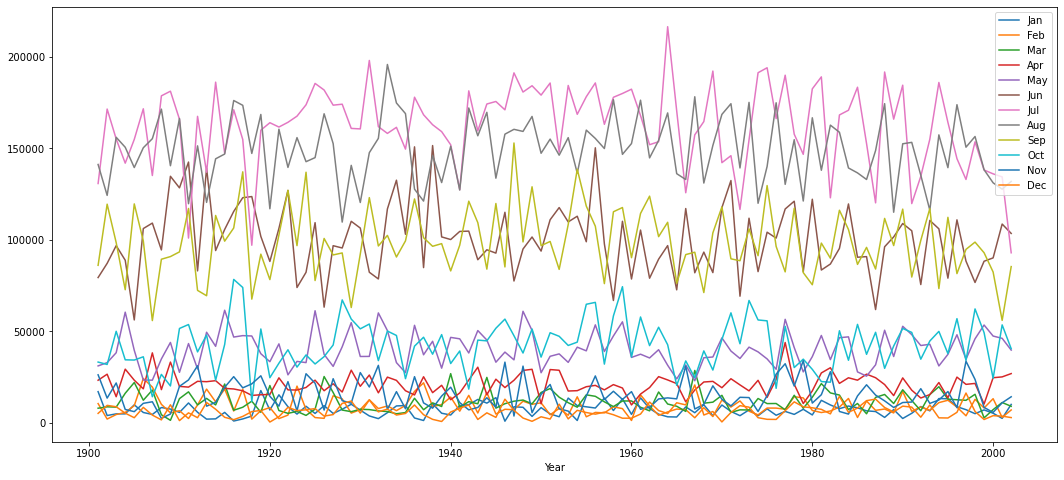

In [18]:
plt= data[['Year','Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']].groupby("Year").sum().plot(figsize=(18,8))

In [19]:
data.cov()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Year,866.383993,3.469545,-30.197238,19.351750,-10.200103,14.987947,-146.157711,-94.650146,-46.557917,-45.825041,72.509016,-22.343761,23.867728,-261.745234
Jan,3.469545,335.189614,102.736618,104.216942,78.507245,7.480438,-143.910775,-130.328068,124.150444,4.700360,-49.900325,14.980892,54.617901,502.438633
Feb,-30.197238,102.736618,493.716715,276.129776,426.305086,668.405062,840.056499,503.786436,658.289472,362.252542,230.267793,-10.934901,23.702305,4574.712321
Mar,19.351750,104.216942,276.129776,1186.397357,1331.712304,2361.354707,3079.885778,2073.747745,1770.419025,1180.292764,834.996430,63.964853,39.091519,14302.208130
Apr,-10.200103,78.507245,426.305086,1331.712304,4835.667506,6566.355476,8900.860456,5782.656952,3864.104729,3247.976824,2933.151604,664.089971,115.350118,38746.734613
May,14.987947,7.480438,668.405062,2361.354707,6566.355476,16939.356541,18648.484437,12557.634473,9046.952365,7048.188913,5953.808307,1044.752754,140.489111,80983.256307
Jun,-146.157711,-143.910775,840.056499,3079.885778,8900.860456,18648.484437,40793.784526,26014.553110,18595.137636,12929.278660,8560.686707,931.105527,-327.245228,138822.669403
Jul,-94.650146,-130.328068,503.786436,2073.747745,5782.656952,12557.634473,26014.553110,41558.376287,20655.932238,13772.040214,4774.503907,-1036.277760,-838.207192,125688.418239
Aug,-46.557917,124.150444,658.289472,1770.419025,3864.104729,9046.952365,18595.137636,20655.932238,27394.735463,10291.559017,3083.404755,-1038.851206,-685.861573,93759.965192
Sep,-45.825041,4.700360,362.252542,1180.292764,3247.976824,7048.188913,12929.278660,13772.040214,10291.559017,16034.641675,3693.120188,-65.436331,-261.223576,68237.386022


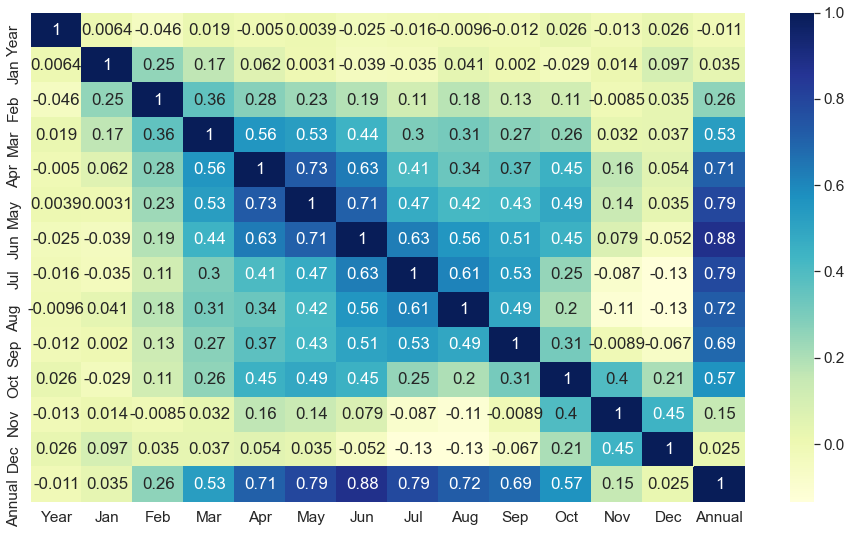

In [22]:
# plotting correlation heatmap
sns.set(font_scale=1.4) 
plt.figure(figsize=(16,9))
cor = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Questions: 

# 1.There are 5 tests performed in the above paper 

•	Auto-correlation, 

•	Homogeneity tests, 

•	Linear regression tests, 

•	Mann–Kendall (MK) test, 

•	Sen’s slope estimator test. 

Repeat any 3 out of 5 tests for the district of Srikakulam, Andhra Pradesh. 

NOTE : (You don’t have to generate maps or present any geospatial output, just the time series testing is sufficient.)


In [23]:
data.dtypes

State        object
District     object
Year          int32
Jan         float64
Feb         float64
Mar         float64
Apr         float64
May         float64
Jun         float64
Jul         float64
Aug         float64
Sep         float64
Oct         float64
Nov         float64
Dec         float64
Annual      float64
dtype: object

In [24]:
#parse strings to datetime type
#data['Year']=pd.to_datetime(data['Year'],infer_datetime_format=True) 

In [25]:
data.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,Andaman & Nicobar Islands,Andaman,1951,13.37,16.60,21.33,39.02,74.15,185.43,298.97,275.11,182.01,78.45,28.34,11.66,1224.45
1,Andaman & Nicobar Islands,Nicobar,1951,13.37,16.60,21.33,39.02,74.15,185.43,298.97,275.11,182.01,78.45,28.34,11.66,1224.45
2,Andhra Pradesh,Adilabad,1901,6.72,10.49,23.29,35.56,23.12,115.55,294.12,276.86,181.62,47.31,1.34,0.00,1015.97
3,Andhra Pradesh,Adilabad,1902,0.42,0.00,0.39,6.07,3.33,45.96,233.97,167.97,198.18,26.45,35.08,11.22,729.04
4,Andhra Pradesh,Adilabad,1903,6.64,1.96,0.17,4.55,33.35,132.08,436.61,334.54,226.04,138.82,14.10,8.82,1337.68


In [26]:
# Getting rainfall data for Arunachal Pradesh
srika = data.loc[(data['District'] == 'Srikakulam')]
srika.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1838,Andhra Pradesh,Srikakulam,1901,41.73,22.54,2.88,5.54,69.16,53.44,79.98,72.14,202.19,126.64,280.16,0.95,957.33
1839,Andhra Pradesh,Srikakulam,1902,6.23,0.02,1.23,10.12,46.26,96.08,130.71,209.03,161.78,100.43,8.53,28.40,798.82
1840,Andhra Pradesh,Srikakulam,1903,1.30,7.86,0.65,2.28,15.25,134.93,284.15,99.16,173.06,116.76,71.86,9.69,916.96
1841,Andhra Pradesh,Srikakulam,1904,0.38,0.46,2.38,0.86,106.06,97.31,127.27,225.32,186.26,159.42,0.68,12.43,918.84
1842,Andhra Pradesh,Srikakulam,1905,1.15,29.11,26.15,122.88,132.91,57.39,139.56,176.91,307.73,39.76,2.86,0.04,1036.47


In [27]:
srika.shape

(102, 16)

In [28]:
dfs = srika[['Year','Annual']]

In [29]:
dfs.set_index('Year', inplace=True)

In [30]:
#Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(dfs.head())
display(dfs.tail())

,Annual
Year,
1901,957.33
1902,798.82
1903,916.96
1904,918.84
1905,1036.47


,Annual
Year,
1998,1302.84
1999,792.56
2000,843.45
2001,940.19
2002,743.58


In [31]:
dfs.describe()

,Annual
count,102.000000
mean,951.914804
std,173.366013
min,555.230000
25%,840.802500
50%,927.725000
75%,1054.942500
max,1542.570000


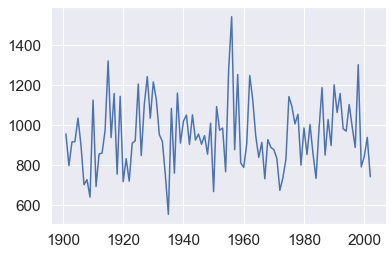

In [32]:
plt.plot(dfs)

# Auto-correlation test

* Differenced time series, to remove the trend
* because ACF & PACF works with stationary time series

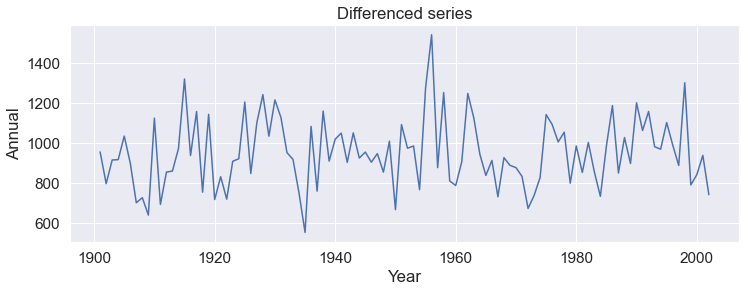

In [33]:
from statsmodels.tsa.statespace.tools import diff

fig = plt.figure(figsize=(12,4))
plt.plot(dfs['Annual'],color='b');
plt.xlabel('Year')
plt.ylabel('Annual')
plt.title('Differenced series')
plt.show()

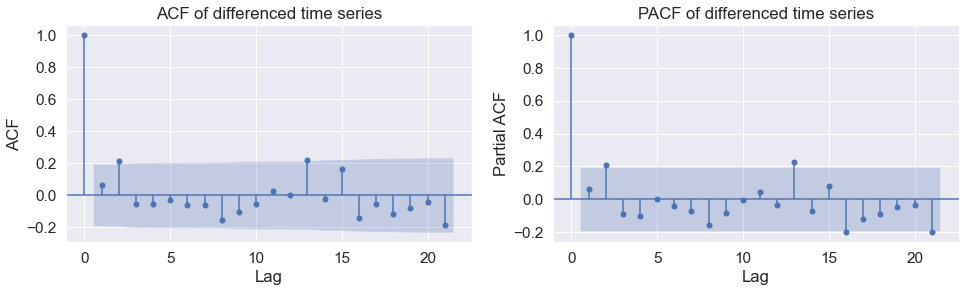

In [34]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
plot_acf(dfs['Annual'], title='ACF of differenced time series',ax=ax1 )
plt.xlabel('Lag')
plt.ylabel('ACF')
ax2 = plt.subplot(1,2,2)
plot_pacf(dfs['Annual'], title='PACF of differenced time series',ax=ax2)
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

1. ACF denotes that the order of moving average process of q
    * ACF -> There are 1 or 2 significant lags
2. PACF dentoes that the order of autoregressive process of p
    * PACF -> There are 7 significant lags

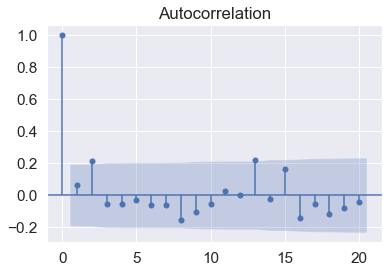

In [35]:
plot_acf(dfs['Annual'], lags=20)
plt.show()

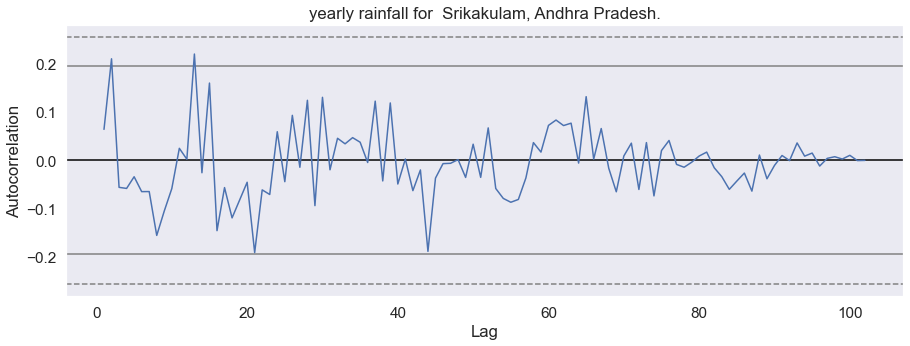

In [36]:
from pandas.plotting import autocorrelation_plot

f3, (ax7) = plt.subplots(figsize=(15, 5))
#f3.tight_layout()

autocorrelation_plot(dfs['Annual'], ax=ax7)
ax7.set_title('yearly rainfall for  Srikakulam, Andhra Pradesh.');

# Mannkendall Test

In [37]:
#!pip install pymannkendall

In [38]:
import pymannkendall as mk

In [41]:
result = mk.original_test(dfs)
result

Mann_Kendall_Test(trend='no trend', h=False, p=0.4627014990114473, z=0.73440572437457, Tau=0.04950495049504951, s=255.0, var_s=119617.66666666667, slope=0.41857142857142954, intercept=906.5871428571428)

In [43]:
res = mk.seasonal_test(dfs,period=12)
res

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=0.45410662927965806, z=0.7485862381397372, Tau=0.0625, s=24.0, var_s=944.0000000000002, slope=5.056666666666653, intercept=906.4448611111112)

* The p-value is p=0.462 which is not less than .05.
* So there is no significant trend in this data.

# Homogeneity test

In [ ]:
#!pip install pyhomogeneity

In [45]:
import pyhomogeneity as hg

In [46]:
pettit = hg.pettitt_test(dfs, alpha=0.05)
pettit

Pettitt_Test(h=False, cp=24, p=0.4793, U=472.0, avg=mean(mu1=897.7616666666667, mu2=968.5773076923077))

In [47]:
buishand = hg.buishand_u_test(dfs)
buishand

Buishand_U_Test(h=False, cp=24, p=0.48075, U=0.12419025789915396, avg=mean(mu1=897.7616666666667, mu2=968.5773076923077))

# 2.How does the results compare to the 12 districts analysed in the paper?


## The statistical evaluation of rainfall time series 

* To analyze and extract useful information from the data, a series of stepwise methods were applied to better understand the characteristics of the rainfall data and the trends.


* The basic descriptive statistics.


* followed by the presence of autocorrelation checked for Srikakulam, Andhara pradesh. 


* After the autocorrelation process, statistical homogeneity tests were also applied that aimed to check the authenticity of the data.

*  Finally, the Mann–Kendall (MK) test and the Sen’s slope estimator test were applied

# 3.There is montly data available for all the years.

* can you extract the annual variability w.r.t moonsoon season over the last ten years
* what are your observations.


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Jan'}>,
        <AxesSubplot:title={'center':'Feb'}>,
        <AxesSubplot:title={'center':'Mar'}>],
       [<AxesSubplot:title={'center':'Apr'}>,
        <AxesSubplot:title={'center':'May'}>,
        <AxesSubplot:title={'center':'Jun'}>,
        <AxesSubplot:title={'center':'Jul'}>],
       [<AxesSubplot:title={'center':'Aug'}>,
        <AxesSubplot:title={'center':'Sep'}>,
        <AxesSubplot:title={'center':'Oct'}>,
        <AxesSubplot:title={'center':'Nov'}>],
       [<AxesSubplot:title={'center':'Dec'}>,
        <AxesSubplot:title={'center':'Annual'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

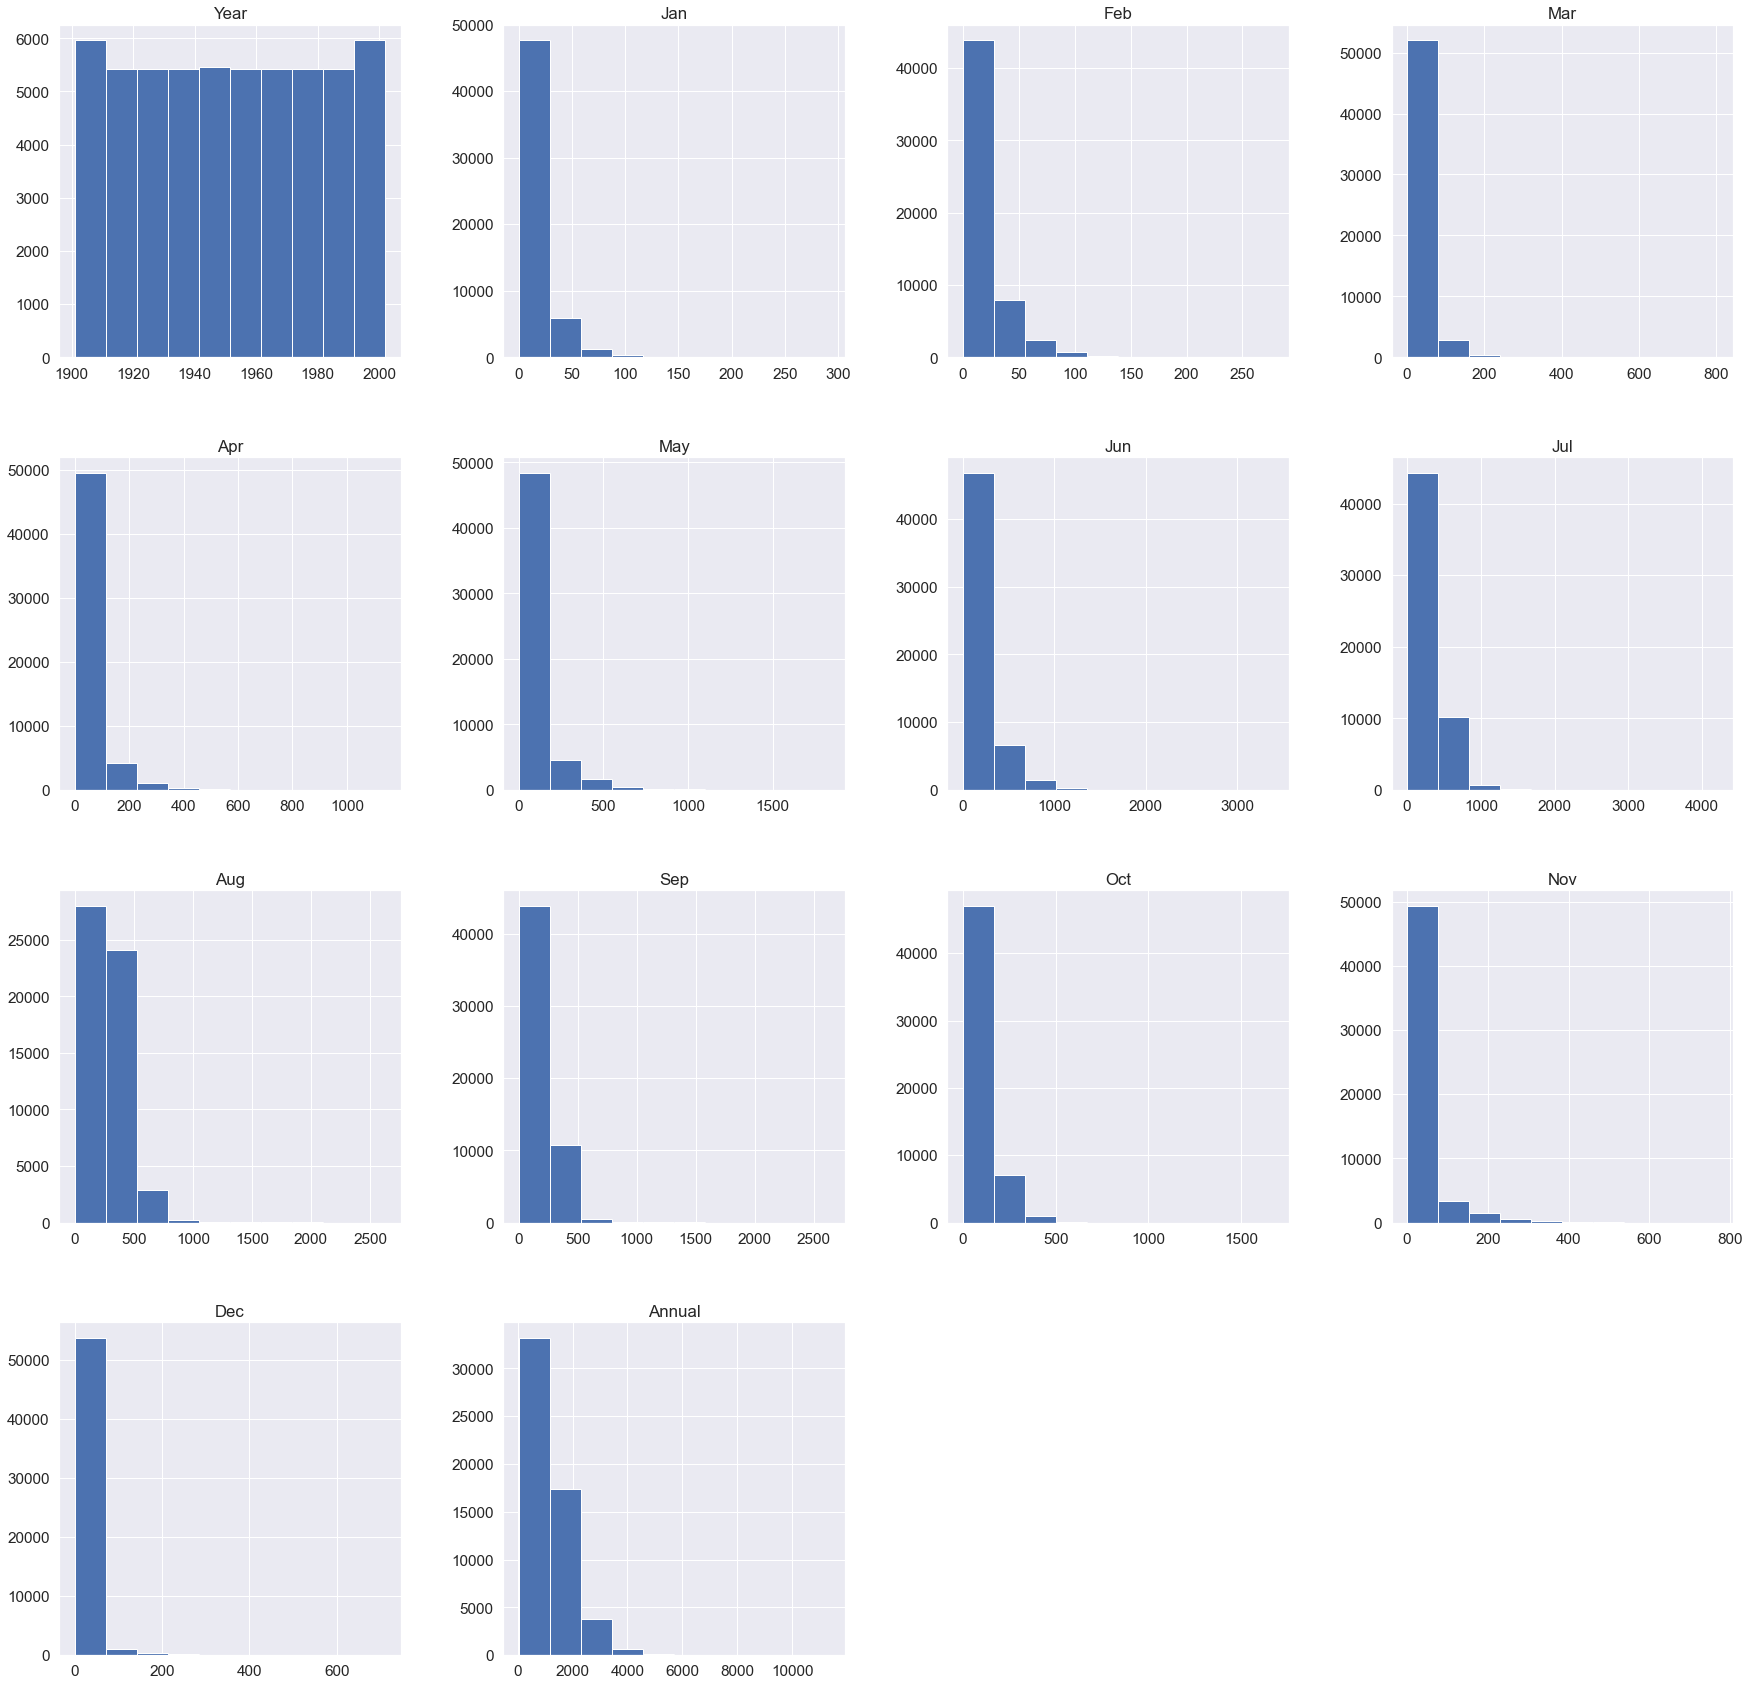

In [48]:
data.hist(figsize =(30,30))

In [49]:
# select the subset data from 1992 to 2002
subset = (data['Year'] >= 1993) & (data['Year'] <= 2002)
temp_df = data.loc[subset]

In [50]:
temp_df.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
94,Andhra Pradesh,Adilabad,1993,0.00,2.50,16.41,6.48,15.42,121.31,314.96,233.11,213.79,154.75,0.15,5.62,1084.51
95,Andhra Pradesh,Adilabad,1994,35.75,8.04,9.02,26.32,8.17,131.28,334.71,286.93,181.15,158.87,19.21,0.00,1199.45
96,Andhra Pradesh,Adilabad,1995,42.02,0.00,42.48,2.13,32.04,155.58,366.16,216.43,238.69,144.96,15.06,0.00,1255.56
97,Andhra Pradesh,Adilabad,1996,1.60,1.41,2.70,17.32,3.34,63.66,283.34,380.35,189.36,96.93,41.17,0.00,1081.17
98,Andhra Pradesh,Adilabad,1997,21.57,0.00,7.30,30.17,10.51,55.98,242.44,228.66,136.05,76.30,73.94,22.80,905.72


In [51]:
temp_df.drop(['District'],axis = 1, inplace=True)
    

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
temp_df.head()

,State,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
94,Andhra Pradesh,1993,0.00,2.50,16.41,6.48,15.42,121.31,314.96,233.11,213.79,154.75,0.15,5.62,1084.51
95,Andhra Pradesh,1994,35.75,8.04,9.02,26.32,8.17,131.28,334.71,286.93,181.15,158.87,19.21,0.00,1199.45
96,Andhra Pradesh,1995,42.02,0.00,42.48,2.13,32.04,155.58,366.16,216.43,238.69,144.96,15.06,0.00,1255.56
97,Andhra Pradesh,1996,1.60,1.41,2.70,17.32,3.34,63.66,283.34,380.35,189.36,96.93,41.17,0.00,1081.17
98,Andhra Pradesh,1997,21.57,0.00,7.30,30.17,10.51,55.98,242.44,228.66,136.05,76.30,73.94,22.80,905.72


In [53]:
temp_df.set_index('Year', inplace=True)

In [54]:
temp_df.mean(axis=1)

Year
1993    166.846923
1994    184.530769
1995    193.162308
1996    166.334615
1997    139.341538
           ...    
1998    230.193846
1999    224.935385
2000    188.197692
2001    193.139231
2002    193.908462
Length: 5420, dtype: float64

In [55]:
temp_df.std(axis=1)

Year
1993    296.193366
1994    325.091150
1995    339.032175
1996    300.766488
1997    243.921724
           ...    
1998    398.916259
1999    397.402630
2000    331.903074
2001    336.188761
2002    336.935898
Length: 5420, dtype: float64

In [56]:
temp_df.var(axis=1)

Year
1993     87730.510306
1994    105684.255574
1995    114942.815719
1996     90460.480544
1997     59497.807631
            ...      
1998    159134.181576
1999    157928.850394
2000    110159.650353
2001    113022.882758
2002    113525.799481
Length: 5420, dtype: float64

# 4.What other directions would you be interested in orienting this work?
For that, what other datasets would you like to explore to validate the results and extend this
project.

* For the time series problem the date column should be clear
* Need more data like rainfall yearly values
* For the better time series forcating the dates sholud be right format
* Need quater wise data for this analysis